In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices
import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns 
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge

import scipy.stats
import scipy.special



from sklearn.model_selection import train_test_split

sns.set()

# Regression - Engineering

## Exercise 1: Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
# exercise 1
df = pd.read_csv('../data/tennis.csv')

df.dropna()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
5,1998,"Gstaad, Switzerland",1998-07-06,WS,Outdoor: Clay,Draw: 32,1,702.0,"$5,250",R32,...,4.0,5.0,10.0,38.0,62.0,35.0,74.0,73.0,136.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",Q,...,1.0,6.0,14.0,49.0,87.0,19.0,77.0,68.0,164.0,True
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True


In [3]:
df[['surface']] = df[['surface']].convert_dtypes(convert_string=True)
df[['player1 name']] = df[['player1 name']].convert_dtypes(convert_string=True)

df = df[df["player1 name"]=="Roger Federer"]
df = df[df['player1 total points won'].notnull()]


x = df[['surface']]
y = df[['player1 total points won']]

x.shape #(1027, 1) # We will transform this into an OHE hereafter
y.shape #(1027, 1)

(1027, 1)

In [4]:
# Feature Engineering for CATEGORICAL VARIABLES: OHE
df.surface.unique()

<StringArray>
[  'Indoor: Hard',  'Outdoor: Clay', 'Indoor: Carpet',  'Outdoor: Hard',
 'Outdoor: Grass']
Length: 5, dtype: string

In [5]:
surface_OHE_df = pd.get_dummies(df.surface,drop_first=True)

# Carpet is dropped from the list. So if it's not one off the following categories,
# it'll carpet

In [6]:
# Now let's search for the Linear Regression between the points vs surface_OHE
# Linear regression without Intercept

model = sm.OLS(y,surface_OHE_df).fit()
model.summary()
#y_pred = model.prediction(x)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.864
Method:                       Least Squares   F-statistic:                              1638.
Date:                      Fri, 17 Feb 2023   Prob (F-statistic):                        0.00
Time:                              15:06:00   Log-Likelihood:                         -5064.4
No. Observations:                      1027   AIC:                                  1.014e+04
Df Residuals:                          1023   BIC:                                  1.016e+04
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      2.412     31.961      0.000      72.350      81.815
Outdoor: Clay     88.0880      2.286     38.540      0.000      83.603      92.573
Outdoor: Grass    98.1667      2.924     33.575      0.000      92.429     103.904
Outdoor: Hard     87.6916      1.624     54.006      0.000      84.505      90.878
==============================================================================
Omnibus:                      214.435   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.809
Skew:                           1.212   Prob(JB):                     6.91e-92
Kurtosis:                       4.983   Cond. No.                         1.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.

A. the AIC/ BIC are >>>10000. An elevated scored is not recommanded for a good model
B. R-Squared fits but the model isn't representative based on the AIC/BIC
C. Coefficients: 
    All the coefficients are positive and
    All the coefficients Pvalues ~0. i.e all the surfaces are contributing to making the score
    
    Indoor: Hard	77.0825
    Outdoor: Clay	88.0880
    Outdoor: Grass	98.1667
    Outdoor: Hard	87.6916
    
    
            
        
    

In [7]:
#2. Answer the following: should your regression include a constant term? 
# Why or why not? 
# How would it change the interpretation of your coefficient and p-value?

In [8]:
surface_OHE_df1 = sm.add_constant(surface_OHE_df)

model1 = sm.OLS(y,surface_OHE_df1).fit(cov_type='HC2')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     16.58
Date:                      Fri, 17 Feb 2023   Prob (F-statistic):           3.59e-13
Time:                              15:06:00   Log-Likelihood:                -4849.5
No. Observations:                      1027   AIC:                             9709.
Df Residuals:                          1022   BIC:                             9734.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    14.9386      4.492      3.326      0.001       6.135      23.742
Outdoor: Hard      4.4635      3.657      1.221      0.222      -2.703      11.630
==============================================================================
Omnibus:                      147.179   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.816
Skew:                           0.932   Prob(JB):                     1.88e-53
Kurtosis:                       4.484   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

A. The AIC/ BIC result are better with the constant ( althought the R-Square is lower),
based on the explanations provided from the previous lectures and Workshops,
the model with the lowest AIC/BIC is better.

B. Yes, we should include the constant.
The Intercept 'absorbs' the missing category 'Indoor: Carpet'. 
So we can actually visualize it now.
Then all other coefficients are based on this INTERCEPT: 
Ex: Const = 83.2281
    Indoor: Hard is Const - 6.1456 = 77.0825
    Outdoor:Clay is Const + 4.8599 = 88.088
    ...
Just as what the previous coefficients were without the INTERCEPT
    
C. Taking the relative std Err into consideration. For the lowest standard error, the important Coefficients based on the Pvalues<0.05 and std err small, are:
    - Const( 'Indoor: Carpet') => 83.2281 | with Std Dev : 3.411
    - Outdoor Grass            => 14.9386 | with Std Dev : 4.492 (relatively high)
        
    => The most predictable surface for Roger Federer to win more point is on the Carpet
    => The Outdoor Grass overall brings point but hight Std_err shows
        either the sample set is to small for an accurate evaluation 
        or wining points on this surface is never consistent(lots of variations) 
    

In [9]:
#3 - Do a t-test to find that the largest coefficient is statistically significantly
#different from the second largest (hint: you can run a t-test only with mean values and
#standard deviations)

In [10]:
df = df[df['player1 total points won'].notnull()]
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
5,1998,"Gstaad, Switzerland",1998-07-06,WS,Outdoor: Clay,Draw: 32,1,702.0,"$5,250",R32,...,4.0,5.0,10.0,38.0,62.0,35.0,74.0,73.0,136.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",Q,...,1.0,6.0,14.0,49.0,87.0,19.0,77.0,68.0,164.0,True
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True


In [11]:
# NULL Hypothesis: the largest coefficient () is statistically significantly
#different from the second largest
# Largest coef :  ['Indoor: Carpet']
# 2nd largest :   ['Outdoor: Grass']

grp1_df = df[df['surface']=='Indoor: Carpet'][df['player1 name']=='Roger Federer']['player1 total points won']
grp1 = np.array(grp1_df)
grp1 = grp1[~np.isnan(grp1)]
grp1
print(grp1.shape) #(57,)

grp2_df = df[df['surface']=='Outdoor: Grass'][df['player1 name']=='Roger Federer']['player1 total points won']
grp2 = np.array(grp2_df)
grp2 = grp2[~np.isnan(grp2)]
grp2
print(grp2.shape) #(132,)

sc.ttest_ind(grp1, grp2, equal_var = False)

(57,)
(132,)


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_47192/3032632321.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grp1_df = df[df['surface']=='Indoor: Carpet'][df['player1 name']=='Roger Federer']['player1 total points won']
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_47192/3032632321.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grp2_df = df[df['surface']=='Outdoor: Grass'][df['player1 name']=='Roger Federer']['player1 total points won']


Ttest_indResult(statistic=-3.3258598583561447, pvalue=0.001131717104804236)

T-Score

A large t-score, or t-value, indicates that the groups are different 

while a small t-score indicates that the groups are similar.

pvalue=0.0011 <<< 0.05 meaning we can reject the NULL Hypothesis


In [12]:
#Let's visually observe this:

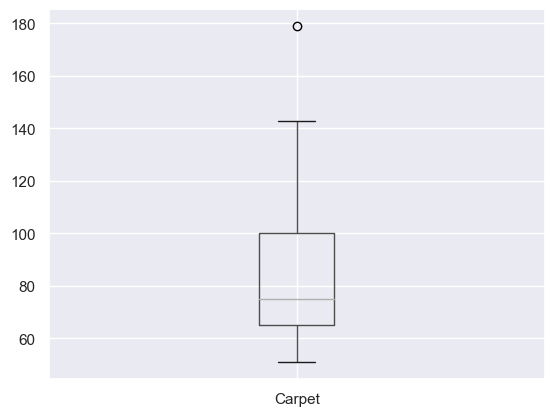

count     57.000000
mean      83.228070
std       25.749492
min       51.000000
25%       65.000000
50%       75.000000
75%      100.000000
max      179.000000
Name: player1 total points won, dtype: float64

In [13]:
df_boxplot1 = pd.DataFrame({'Carpet':grp1})
df_boxplot1.boxplot()
plt.show()
grp1_df.describe()

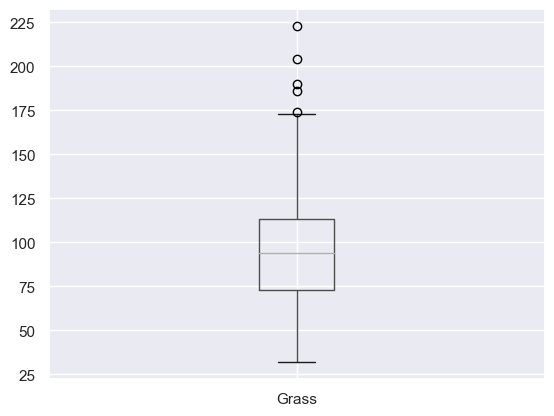

count    132.000000
mean      98.166667
std       33.580294
min       32.000000
25%       73.000000
50%       94.000000
75%      113.250000
max      223.000000
Name: player1 total points won, dtype: float64

In [14]:
df_boxplot2 = pd.DataFrame({'Grass':grp2})
df_boxplot2.boxplot()
#sns.boxplot(data=df_boxplot2)
plt.show()
grp2_df.describe()

In [15]:
We can see that the median points won on both groups Carpet / Grass:
    on the Carpet = 75 std_dev = 25.74
    on the Grass = 94 std_dev = 33.5 (we actually notice the standard deviation is not
                                      because of the lack of measures but just because the surface bring
                                      a lot of variance to the outcome of the earned points)
    
The grass looks to have a significant impact on the points earned, 
unlike what the coefficient seems to indicate

SyntaxError: invalid syntax (1345524904.py, line 1)

## Exercise 2: Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

# exercise 2
1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did


1. Use non-regularized regression to build the best model you can. 
Show 2 alternate model speficications and explain why you chose the one you did



In [107]:

df_titan = sns.load_dataset('titanic')
df_titan.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [108]:
df_titan['sex'].unique()
df_titan['sex_'] = pd.get_dummies(df_titan['sex'],drop_first=True )

In [109]:
#FIX the NAN:
#df_titan['pclass'].info()
#df_titan['sex_'].info()
#df_titan['age'].info() #714 non-null/ 891 entries
#df_titan['fare'].info()
#df_titan.isnull().sum()

df_titan = df_titan[df_titan['age'].notnull()]
df_titan.isnull().sum()
df_titan.info()

#the column we use all have the same dimensions now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
 15  sex_         714 non-null    uint8   
dtypes: bool(2), category(2), float64(2), int64(4), object(5), uint8(1)
memory usage: 70.9+ KB


In [110]:
#Preparing the model with a constant

x = df_titan[['pclass', 'sex_', 'age','fare']]
y = df_titan[['survived']]

X = sm.add_constant(x)
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           9.83e-75
Time:                        18:13:40   Log-Likelihood:                -328.83
No. Observations:                 714   AIC:                             667.7
Df Residuals:                     709   BIC:                             690.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3169      0.077     17.104      0.000       1.166       1.468
pclass        -0.2004      0.023     -8.907      0.000      -0.245      -0.156
sex_          -0.4787      0.031    -15.518      0.000      -0.539      -0.418
age           -0.0054      0.001     -4.975      0.000      -0.008      -0.003
fare        6.801e-05      0.000      0.205      0.838      -0.001       0.001
==============================================================================
Omnibus:                       24.788   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.676
Skew:                           0.473   Prob(JB):                     1.61e-06
Kurtosis:                       3.046   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
X.shape #(714, 5)
y.shape #(714, 1)

X

,const,pclass,sex_,age,fare
0,1.0,3,1,22.0,7.2500
1,1.0,1,0,38.0,71.2833
2,1.0,3,0,26.0,7.9250
3,1.0,1,0,35.0,53.1000
4,1.0,3,1,35.0,8.0500
...,...,...,...,...,...
885,1.0,3,0,39.0,29.1250
886,1.0,2,1,27.0,13.0000
887,1.0,1,0,19.0,30.0000
889,1.0,1,1,26.0,30.0000


In [112]:
X_2 = sm.add_constant(np.column_stack((x, x**2)))

# Conversion to DataFrame For visualization purpose: Not used as input to generate the model
X_2_df = pd.DataFrame(X_2)

X_2_df.rename(columns = {0:'const'}, inplace = True)
X_2_df.rename(columns = {1:'pclass'}, inplace = True)
X_2_df.rename(columns = {2:'sex_'}, inplace = True)
X_2_df.rename(columns = {3:'age'}, inplace = True)
X_2_df.rename(columns = {4:'fare'}, inplace = True)
X_2_df.rename(columns = {5:'pclass_2'}, inplace = True)
X_2_df.rename(columns = {6:'sex_2'}, inplace = True)
X_2_df.rename(columns = {7:'age_2'}, inplace = True)
X_2_df.rename(columns = {8:'fare_2'}, inplace = True)
X_2_df

,const,pclass,sex_,age,fare,pclass_2,sex_2,age_2,fare_2
0,1.0,3.0,1.0,22.0,7.2500,9.0,1.0,484.0,52.562500
1,1.0,1.0,0.0,38.0,71.2833,1.0,0.0,1444.0,5081.308859
2,1.0,3.0,0.0,26.0,7.9250,9.0,0.0,676.0,62.805625
3,1.0,1.0,0.0,35.0,53.1000,1.0,0.0,1225.0,2819.610000
4,1.0,3.0,1.0,35.0,8.0500,9.0,1.0,1225.0,64.802500
...,...,...,...,...,...,...,...,...,...
709,1.0,3.0,0.0,39.0,29.1250,9.0,0.0,1521.0,848.265625
710,1.0,2.0,1.0,27.0,13.0000,4.0,1.0,729.0,169.000000
711,1.0,1.0,0.0,19.0,30.0000,1.0,0.0,361.0,900.000000
712,1.0,1.0,1.0,26.0,30.0000,1.0,1.0,676.0,900.000000


In [113]:
model_2 = sm.OLS(y, X_2).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     66.15
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.41e-73
Time:                        18:13:45   Log-Likelihood:                -325.36
No. Observations:                 714   AIC:                             666.7
Df Residuals:                     706   BIC:                             703.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5778      0.187      8.438      0.000       1.211       1.945
x1            -0.3175      0.161     -1.978      0.048      -0.633      -0.002
x2            -0.2452      0.016    -15.683      0.000      -0.276      -0.215
x3            -0.0107      0.003     -3.234      0.001      -0.017      -0.004
x4            -0.0016      0.001     -1.914      0.056      -0.003       4e-05
x5             0.0214      0.037      0.578      0.563      -0.051       0.094
x6            -0.2452      0.016    -15.683      0.000      -0.276      -0.215
x7          7.637e-05   4.83e-05      1.582      0.114   -1.84e-05       0.000
x8          4.158e-06   1.88e-06      2.216      0.027    4.74e-07    7.84e-06
==============================================================================
Omnibus:                       23.493   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.990
Skew:                           0.454   Prob(JB):                     3.75e-06
Kurtosis:                       3.131   Cond. No.                     6.54e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Google: 


    The Bayesian Information Criterion (BIC) is more useful in selecting a correct model
    while the (AIC) is more appropriate in finding the best model for predicting future observations.

In [10]:
# Here we want the best model. We do not need to predict future observations
# So we focus on the BIC.

# Best BIC: Model1
#     BIC:	690.5
#     R-squared:	0.390 (Note the Model_2 had a slightly better R-squared:	0.396)
 

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? 
How does this relate to socio-economic characteristics and "real-world" interpretation?

In [11]:
## MODEL1:
#                 Pvalue
#const	1.3169      0    Impactful coef | Low std Deviation
#pclass	-0.2004     0    Impactful coef | Low std Deviation
#sex_	-0.4787     0    Impactful coef | Low std Deviation
#age	-0.0054     0    Impactful coef | Low std Deviation
#fare	6.801e-05   0.838 >>>0.05 : Free degree. Not much impact on survival. Could be removed from the df inputs 

### This shows that: 
### The higher the passenger class, the lower the rate of survival
### The sex played the most important role. A female had 0.47% less chances to survive
### The survival also decreases with age
### The rate of the fare didn't play a great role in the survival.
    
    
    
    

"""
#For info The model2 indicated 
            coef	  P>|t|
const	    1.5778	  0.000 Impactful coef
x1pclass   -0.3175	  0.048 Impactful coef
x2sex	   -0.2452	  0.000 Impactful coef
x3age	   -0.0107	  0.001 Impactful coef
x4fare	   -0.0016	  0.056 Free degree. Not much impact on survival 
x5pclass_2	0.0214	  0.563 Free degree. Not much impact on survival 
x6sex_2	   -0.2452	  0.000 Impactful coef
x7age_2	    7.637e-05 0.114 Free degree. Not much impact on survival 
x8fare_2    4.158e-06 0.027 Impactful coef
"""

'\n#For info The model2 indicated \n            coef\t  P>|t|\nconst\t    1.5778\t  0.000 Impactful coef\nx1pclass   -0.3175\t  0.048 Impactful coef\nx2sex\t   -0.2452\t  0.000 Impactful coef\nx3age\t   -0.0107\t  0.001 Impactful coef\nx4fare\t   -0.0016\t  0.056 Free degree. Not much impact on survival \nx5pclass_2\t0.0214\t  0.563 Free degree. Not much impact on survival \nx6sex_2\t   -0.2452\t  0.000 Impactful coef\nx7age_2\t    7.637e-05 0.114 Free degree. Not much impact on survival \nx8fare_2    4.158e-06 0.027 Impactful coef\n'


3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [12]:
# The type of outputs we want is similar to : ypred is in % of surviving
# ypred = [.2, .4, .1, .4, .7, .7]
# ytrue = [0, 1, 0, 0, 1, 1,]

# We calculate the Residual Error, and improve the 2 of the model

In [14]:
# Let's use the Ridge regression : L2 Regularization
#
#1. On the subset N (70% of the original population),
# The criteria could be the measure of the variance:
#      variance =  sum.1.to.N.(yhat - ybar)^2/(n-1) on the test data
#      We could tune the Ridge alpha until we get the smallest variance.
#      But this would mean setting alpha to the lowest = 0
#      Going with the variance only is risking to get an overfit model
#2. We can also use R-Square to get an approximation of the best model around 0.7
#      R^2 = 1 - SSR/SST = 1 - sum.1.to.N.(yi - yhat)^2 / sum.1.to.N.(yi - ybar)^2

#----------------------------------------------------------------------------------------#
from math import sqrt
#1- Function to split training data vs Testing data
y_train, y_test, x_train, x_test = train_test_split(y, X, test_size=0.3)

def optimizeModel(y_train, y_test, x_train, x_test, pf=15, alpha=1):
    model11 = make_pipeline(PolynomialFeatures(pf),Ridge(alpha=alpha)) #0.3
    # We can play with the alpha to prevent the OVERFIT
    # When the Degree increases, some coef may not be required. Alpha is like a seatbelt
    model11.fit(x_train,y_train)
    y_pred = model11.predict(x_test)

    R_sq = r2_score(y_test, y_pred)
    
    #yhat = np.mean(y_pred[np.newaxis:,0])
    #ybar = np.mean(y_test.values[np.newaxis:,0])
    #for y_t in y_test.values[np.newaxis:,0]:
    #    agg_ssr = (y_t-yhat)**2
    #    agg_sst = (y_t-ybar)**2
    #R_sq = 1 - agg_ssr/agg_sst
    
    return R_sq

def best_R(Rsq_rec):

    R_ref = 0.7    
    list_R = Rsq_rec.values()

    best_Rsq = min(list_R, key=lambda x:abs(x-R_ref)) # We take the R that has the minimum distance with our R Reference
    
    for k,v in Rsq_rec.items():
        if v==best_Rsq:
            return k, v

#----------------------------------------------------------------------------------------#

# Start with a Degree 3 and alpha 5.
# The Degree goes from 3 to 1
# For each Degree the alpha is lowered from 5 down to 0
# The R is evaluated for each combinaison of Degree / alpha
# The best R result yields the best combinaison Degree / alpha
        
pf=3
a =10
alpha_range = np.arange(10,0,-0.1)


optimizeModel(y_train, y_test, x_train, x_test, pf=pf, alpha=a)

Rsq_rec = {}
while pf>0:
    for a in alpha_range:
        Rsq = optimizeModel(y_train, y_test, x_train, x_test, pf=pf, alpha=a)
        #print(Rsq)
        Rsq_rec.update({(pf,a):Rsq})
    pf-=1
combo = best_R(Rsq_rec)
K,V = combo[0], combo[1]

print('K', K, 'V',V)



/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.10368e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.07969e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.05569e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.0317e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-p

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.13287e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.65051e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.99204e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.35404e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-

K (2, 0.700000000000033) V 0.37997803195347524


In [25]:
# the minimum variance is obtained when:
#PolynomialDegree = 2
#Alpha = 0.7
#Rsq -> 0.38 



In [114]:
X1_ = X
X1_

,const,pclass,sex_,age,fare
0,1.0,3,1,22.0,7.2500
1,1.0,1,0,38.0,71.2833
2,1.0,3,0,26.0,7.9250
3,1.0,1,0,35.0,53.1000
4,1.0,3,1,35.0,8.0500
...,...,...,...,...,...
885,1.0,3,0,39.0,29.1250
886,1.0,2,1,27.0,13.0000
887,1.0,1,0,19.0,30.0000
889,1.0,1,1,26.0,30.0000


In [115]:
age_min = X1_['age'].min()
age_max = X1_['age'].max()
age_max
X1_ = X1_.drop(['age'],axis=1)


In [116]:

X1_col = X1_.columns[1:]

for col in X1_col:
    X1_[col]=X1_[col].mean()

age_range = np.linspace(age_min,age_max,714)



X1_.insert(3,'age',age_range)
X1_


,const,pclass,sex_,age,fare
0,1.0,2.236695,0.634454,0.420000,34.694514
1,1.0,2.236695,0.634454,0.531613,34.694514
2,1.0,2.236695,0.634454,0.643226,34.694514
3,1.0,2.236695,0.634454,0.754839,34.694514
4,1.0,2.236695,0.634454,0.866452,34.694514
...,...,...,...,...,...
885,1.0,2.236695,0.634454,79.553548,34.694514
886,1.0,2.236695,0.634454,79.665161,34.694514
887,1.0,2.236695,0.634454,79.776774,34.694514
889,1.0,2.236695,0.634454,79.888387,34.694514


In [117]:
# get the optimized model:
model11 = make_pipeline(PolynomialFeatures(2),Ridge(alpha=0.7)) 
model11.fit(X,y)
y_pred11 = model11.predict(X1_)

#get the predictions for our 1st picked model
y_pred1 = model1.predict(X1_)



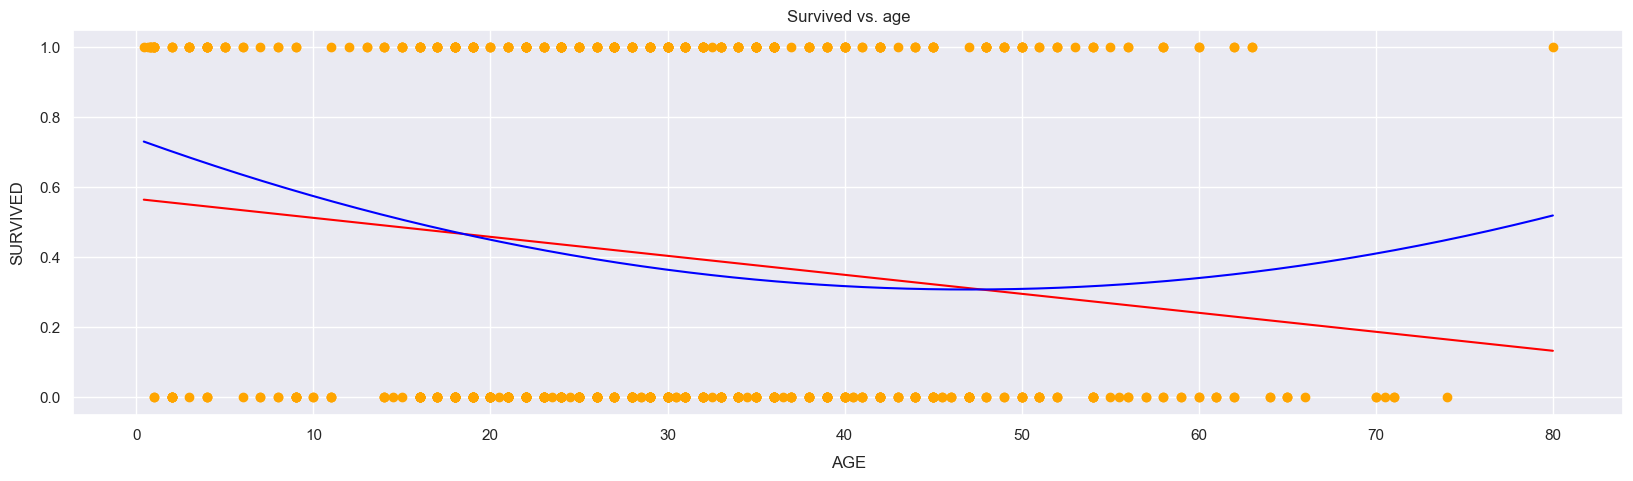

In [118]:
fig, ax1 = plt.subplots(figsize=(20, 5))


plt.scatter(x['age'], y,color='orange')
plt.plot(X1_['age'], y_pred1,color='red');
plt.plot(X1_['age'], y_pred11,color='blue');

ax1.set_title('Survived vs. age')
ax1.set_xlabel('AGE', labelpad=10)
ax1.set_ylabel('SURVIVED', labelpad=10)

plt.show()

In [ ]:
# The blue line shows a more accurate model:
# We can now see that the accuracy is improved
# the model is more realistic since kids under 20 had a higher chance of survival overall
# the bottom of the curve shows the lowest age of survival: 45 yo.
# It starts to rise again after 45yo. But since the data after that age seem scarse, 
# not sure whether this would represent the reality

## Exercise 3: House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [142]:
# exercise 3
df_house = pd.read_csv('../data/house_price.csv')
df_house.dropna()
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [143]:

# df_house.info()


In [144]:
# We could use every features to get the most integrated model
# for this exercise, let's pick what seem to be the most meaningful features
# then make the model as accurate based on the features we picked. 
# We will re-use the optimization function from the Ex2

#FEATURES Picked:
# MSZoning: Identifies the general zoning classification of the sale.
# LotArea: Lot size in square feet
# Utilities: Type of utilities available
# OverallCond: Rates the overall condition of the house
# YearBuilt: Original construction date
# PoolArea: Pool area in square feet



In [145]:
# MSZoning: Identifies the general zoning classification of the sale.

#df_house['MSZoning'].info() # 1460 Non-Null | object
#df_house['LotArea'].info()  # 1460 non-null | int64
#df_house['Utilities'].info() # 1460 non-null | object
#df_house['OverallCond'].info() # 1460 non-null | int64
#df_house['YearBuilt'].info() # 1460 non-null |  int64
#df_house['PoolArea'].info() # 1460 non-null | int64

# let's modify the type of the object types

In [146]:
df_house['MSZoning']= df_house['MSZoning'].convert_dtypes(convert_string=True)
#df_house['MSZoning'].info() # 1460 non-null | string

In [147]:
df_house['Utilities']= df_house['Utilities'].convert_dtypes(convert_string=True)
#df_house['Utilities'].info() #1460 non-null | string

In [148]:
# Let's modify the Categorical Data:
df_house.MSZoning.unique()  # ['RL', 'RM', 'C (all)', 'FV', 'RH']
df_house.Utilities.unique() # ['AllPub', 'NoSeWa']



<StringArray>
['AllPub', 'NoSeWa']
Length: 2, dtype: string

In [149]:
MSZoning_OHE_df = pd.get_dummies(df_house.MSZoning,drop_first=False) # We don't drop 1st column, 
Utilities_OHE_df = pd.get_dummies(df_house.Utilities, drop_first=False) # because No Correlation between the categories
MSZoning_OHE_df

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [150]:
# Let's build the desired x axis DataFrame:

df_house = pd.concat([df_house, MSZoning_OHE_df], axis=1)
df_house = pd.concat([df_house, Utilities_OHE_df], axis=1)
x_hse = df_house[['FV','RH','RL','RM','FV','RH','RL','RM','NoSeWa','LotArea', 'OverallCond', 'YearBuilt', 'PoolArea' ]]
X_hse = sm.add_constant(x_hse)
X_hse.shape # (1460, 59)
X_hse

,const,FV,RH,RL,RM,FV,RH,RL,RM,NoSeWa,LotArea,OverallCond,YearBuilt,PoolArea
0,1.0,0,0,1,0,0,0,1,0,0,8450,5,2003,0
1,1.0,0,0,1,0,0,0,1,0,0,9600,8,1976,0
2,1.0,0,0,1,0,0,0,1,0,0,11250,5,2001,0
3,1.0,0,0,1,0,0,0,1,0,0,9550,5,1915,0
4,1.0,0,0,1,0,0,0,1,0,0,14260,5,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0,0,1,0,0,0,1,0,0,7917,5,1999,0
1456,1.0,0,0,1,0,0,0,1,0,0,13175,6,1978,0
1457,1.0,0,0,1,0,0,0,1,0,0,9042,9,1941,0
1458,1.0,0,0,1,0,0,0,1,0,0,9717,6,1950,0


In [151]:
#Let's get the y DataFrame
y_hse = df_house[['SalePrice']]  #1460 non-null |  int64
y_hse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [152]:
df_house.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
              ... 
RH               0
RL               0
RM               0
AllPub           0
NoSeWa           0
Length: 88, dtype: int64

In [153]:
# Let's reuse the optimization function from Ex 2
from math import sqrt

def optimizeModel(y_train, y_test, x_train, x_test, pf=15, alpha=1):
    model = make_pipeline(PolynomialFeatures(pf),Ridge(alpha=alpha)) #0.3
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R_sq = r2_score(y_test, y_pred)
    return R_sq

def best_R(Rsq_rec):
    R_ref = 0.7    
    list_R = Rsq_rec.values()
    best_Rsq = min(list_R, key=lambda x:abs(x-R_ref)) # We take the R that has the minimum distance with our R Reference    
    for k,v in Rsq_rec.items():
        if v==best_Rsq:
            return k, v


In [161]:
# The X data is split 30% / 70 % to train and test of seperate groups of data
y_train_hse, y_test_hse, x_train_hse, x_test_hse = train_test_split(y_hse, X_hse, test_size=0.3)


In [162]:
pf=3
a =10
alpha_range = np.arange(10,0,-0.1)

Rsq_rec = {}
while pf>0:
    for a in alpha_range:
        Rsq = optimizeModel(y_train_hse, y_test_hse, x_train_hse, x_test_hse, pf=pf, alpha=a)
        Rsq_rec.update({(pf,a):Rsq})
    pf-=1
combo = best_R(Rsq_rec)
K,V = combo[0], combo[1]

print('K', K, 'V',V)

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.01293e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.9828e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.95267e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.92254e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-p

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.89815e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.86802e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.83789e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.80776e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-

/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.61552e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.31422e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.01293e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.71164e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Sam/opt/anaconda3/lib/python3.9/site-

K (2, 0.10000000000003517) V 0.5416335618649606


In [65]:
# The optimization gave the following parameters:
# Degree: 2, Alpha: 0.10, R-Squared: 0.5416335618649606

In [163]:
X_hse

,const,FV,RH,RL,RM,FV,RH,RL,RM,NoSeWa,LotArea,OverallCond,YearBuilt,PoolArea
0,1.0,0,0,1,0,0,0,1,0,0,8450,5,2003,0
1,1.0,0,0,1,0,0,0,1,0,0,9600,8,1976,0
2,1.0,0,0,1,0,0,0,1,0,0,11250,5,2001,0
3,1.0,0,0,1,0,0,0,1,0,0,9550,5,1915,0
4,1.0,0,0,1,0,0,0,1,0,0,14260,5,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0,0,1,0,0,0,1,0,0,7917,5,1999,0
1456,1.0,0,0,1,0,0,0,1,0,0,13175,6,1978,0
1457,1.0,0,0,1,0,0,0,1,0,0,9042,9,1941,0
1458,1.0,0,0,1,0,0,0,1,0,0,9717,6,1950,0


In [164]:
# Now let's get our predictions based on the x axis

model_hse = make_pipeline(PolynomialFeatures(2),Ridge(alpha=0.10)) #0.3
model_hse.fit(X_hse,y_hse)



/Users/Sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.74966e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.1))])

In [175]:
# Let's pick a moving value that we will observe influencing the SalesPrice
# Let's observe the impact of the YEARBUILT

X_hse_avg = X_hse.copy()


min_YearBuilt = X_hse_avg['YearBuilt'].min()
max_YearBuilt = X_hse_avg['YearBuilt'].max()

YearBuilt_rng = np.linspace(min_YearBuilt,max_YearBuilt,1460)

#set all other values to there mean
col_X_hse = X_hse_avg.columns[1:]

for col in col_X_hse:
    X_hse_avg[col]=X_hse_avg[col].mean()



#x_hse = x_hse.drop('NoSeWa',axis=1)
#x_hse.insert(9,'NoSeWa',sewa_range)

X_hse_avg['YearBuilt']=YearBuilt_rng

X_hse_avg


,const,FV,RH,RL,RM,FV,RH,RL,RM,NoSeWa,LotArea,OverallCond,YearBuilt,PoolArea
0,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,1872.000000,2.758904
1,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,1872.094585,2.758904
2,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,1872.189171,2.758904
3,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,1872.283756,2.758904
4,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,1872.378341,2.758904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,2009.621659,2.758904
1456,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,2009.716244,2.758904
1457,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,2009.810829,2.758904
1458,1.0,0.044521,0.010959,0.788356,0.149315,0.044521,0.010959,0.788356,0.149315,0.000685,10516.828082,5.575342,2009.905415,2.758904


In [176]:
# With the model we obtained, we can predict what the new loss function will looks like base on the averaged x-axis
y_hse_pred = model_hse.predict(X_hse_avg)


[]

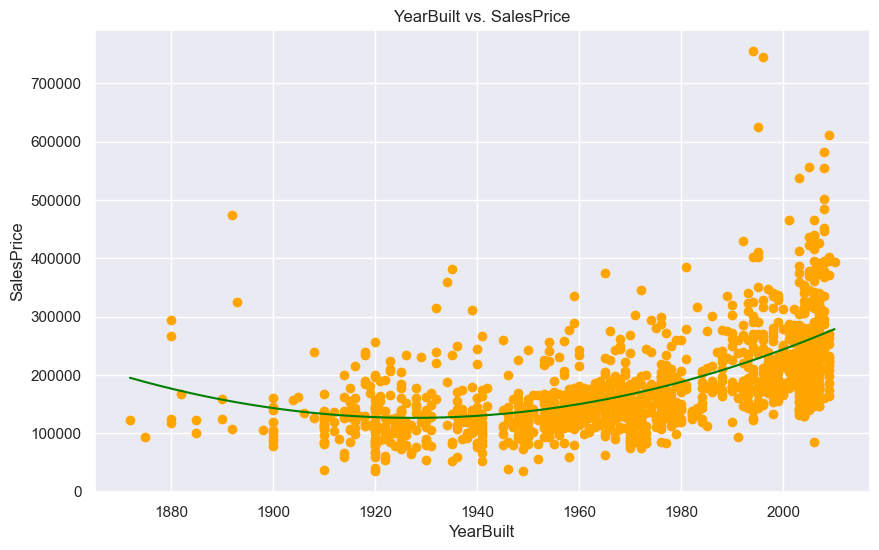

In [177]:
# The results are plotted:

fig, ax1 = plt.subplots(figsize=(10,6))

plt.scatter(x_hse['YearBuilt'], y_hse['SalePrice'], color='orange')

plt.plot(X_hse_avg['YearBuilt'], y_hse_pred, color='green')

ax1.set_title('YearBuilt vs. SalesPrice')
ax1.set_xlabel('YearBuilt')
ax1.set_ylabel('SalesPrice')

plt.plot()

